In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
# This file was too big so we deleted it so we can share the github repository

#   df = pd.read_csv('final_data3.csv')

C:\Users\eisha\AppData\Local\Temp\ipykernel_20768\1089639029.py:1: DtypeWarning: Columns (7,8,15,16,18,27,30,31,33,34,35,43,56,57,58,59,63,151,162,167,179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final_data3.csv')


In [3]:
df.columns

Index(['Unnamed: 0', 'CASE_ID', 'ACCIDENT_YEAR_x', 'PROC_DATE', 'JURIS',
       'COLLISION_DATE', 'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT',
       'DAY_OF_WEEK',
       ...
       'SPECIAL_INFO_F', 'SPECIAL_INFO_G', 'ACCIDENT_YEAR_y', 'SAFETY_USED',
       'UNDER_INFLUENCE', 'AT_FAULT_FLAG', 'IS_MALE', 'DRUG_IMPAIRED',
       'HAS_INSURANCE', 'IS_DRIVER'],
      dtype='object', length=190)

In [4]:
df.head()

,Unnamed: 0,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,...,SPECIAL_INFO_F,SPECIAL_INFO_G,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER
0,0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
# Show all column names in a readable list
for col in df.columns.tolist():
    print(col)


Unnamed: 0
CASE_ID
ACCIDENT_YEAR_x
PROC_DATE
JURIS
COLLISION_DATE
COLLISION_TIME
OFFICER_ID
REPORTING_DISTRICT
DAY_OF_WEEK
CHP_SHIFT
POPULATION
CNTY_CITY_LOC
SPECIAL_COND
BEAT_TYPE
CHP_BEAT_TYPE
CITY_DIVISION_LAPD
CHP_BEAT_CLASS
BEAT_NUMBER
PRIMARY_RD
SECONDARY_RD
DISTANCE
DIRECTION
INTERSECTION
WEATHER_1
WEATHER_2
STATE_HWY_IND
CALTRANS_COUNTY
CALTRANS_DISTRICT
STATE_ROUTE
ROUTE_SUFFIX
POSTMILE_PREFIX
POSTMILE
LOCATION_TYPE
RAMP_INTERSECTION
SIDE_OF_HWY
TOW_AWAY
COLLISION_SEVERITY
NUMBER_KILLED
NUMBER_INJURED
PARTY_COUNT
PRIMARY_COLL_FACTOR
PCF_CODE_OF_VIOL
PCF_VIOL_CATEGORY
PCF_VIOLATION
PCF_VIOL_SUBSECTION
HIT_AND_RUN
TYPE_OF_COLLISION
MVIW
PED_ACTION
ROAD_SURFACE
ROAD_COND_1
ROAD_COND_2
LIGHTING
CONTROL_DEVICE
CHP_ROAD_TYPE
PEDESTRIAN_ACCIDENT
BICYCLE_ACCIDENT
MOTORCYCLE_ACCIDENT
TRUCK_ACCIDENT
NOT_PRIVATE_PROPERTY
ALCOHOL_INVOLVED
STWD_VEHTYPE_AT_FAULT
CHP_VEHTYPE_AT_FAULT
COUNT_SEVERE_INJ
COUNT_VISIBLE_INJ
COUNT_COMPLAINT_PAIN
COUNT_PED_KILLED
COUNT_PED_INJURED
COUNT_BICYCLIST_KI

In [6]:
drop_cols = [
    'Unnamed: 0', 'CIscore', 'CIscoreP', 'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P',
    'DieselPM', 'DieselPM_P', 'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P',
    'Traffic', 'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P', 'Cleanup',
    'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP', 'ImpWatBod',
    'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd', 'PolBurdSc', 'PolBurdP',
    'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP', 'Cardiovas', 'CardiovasP'
]
df = df.drop(columns=drop_cols)

In [7]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,SPECIAL_INFO_F,SPECIAL_INFO_G,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,-,2022.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
# Since we joined the party data and crashes data to the original crashes data, we now need to aggregate it
# We chose to aggregate multiple columns but we also wanted to drop passenger data since it was not relevant
# used Copy to modify it freely without losing anything

In [9]:
# Just keep driver rows and drop all drivers with ages of 998 as stated in codebook
# Because we dont need the passenger data

df = df[(df['IS_DRIVER'] == 1) & (df['PARTY_AGE'] != 998)].copy()

In [10]:
# Now create a string binary values for age. 
# I created two binary columns that identify if the driver is old (above 65) or young (under 25)
df['IS_YOUNG_DRIVER'] = df['PARTY_AGE'] < 25
df['IS_ELDERLY_DRIVER'] = df['PARTY_AGE'] > 65

For age, we split into young vs old driver and every other driver stayed as is.

For impairment vs sobriety, the codebook says

Party Sobriety	PARTY_SOBRIETY	psober	Char(1)	The state of sobriety of the party 	

A - Had Not Been Drinking
B - Had Been Drinking, Under Influence
C - Had Been Drinking, Not Under Influence
D - Had Been Drinking, Impairment Unknown
G - Impairment Unknown
H - Not Applicable

"-  - Not Stated"


In [12]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False


In [13]:
# We chose to treat B, C, D, G as impaired or possibly impaired.
# A are treated as not impaired.
#I dropped H and -

In [14]:
# Dropping rows in this code where PARTY_SOBRIETY is '-' (Not Stated) or 'H' (Not Applicable)
df = df[~df['PARTY_SOBRIETY'].isin(['-', 'H'])].copy()

In [15]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False


In [16]:
# Now we want to make gender into string
# Currently it is M F X and -

#I will drop all the - and X

df = df[~df['PARTY_SEX'].isin(['-', 'X'])].copy()

In [17]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,False,True
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,False,False


In [18]:
# Create binary gender string: 1 = male, 0 = female
df['IS_MALE'] = df['PARTY_SEX'].map({'M': 1, 'F': 0})

In [19]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0,0.0,1.0,1.0,False,True
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0,0.0,1.0,1.0,False,True
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False


In [20]:
df.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,ACCIDENT_YEAR_y,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0,0.0,1.0,1.0,False,True
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,0.0,0,0.0,1.0,1.0,False,True
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,2022.0,1.0,0.0,1.0,0,0.0,1.0,1.0,False,False


In [21]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR_x', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT',
       ...
       'ACCIDENT_YEAR_y', 'SAFETY_USED', 'UNDER_INFLUENCE', 'AT_FAULT_FLAG',
       'IS_MALE', 'DRUG_IMPAIRED', 'HAS_INSURANCE', 'IS_DRIVER',
       'IS_YOUNG_DRIVER', 'IS_ELDERLY_DRIVER'],
      dtype='object', length=154)

In [22]:
# Show all column names in a readable list
for col in df.columns.tolist():
    print(col)


CASE_ID
ACCIDENT_YEAR_x
PROC_DATE
JURIS
COLLISION_DATE
COLLISION_TIME
OFFICER_ID
REPORTING_DISTRICT
DAY_OF_WEEK
CHP_SHIFT
POPULATION
CNTY_CITY_LOC
SPECIAL_COND
BEAT_TYPE
CHP_BEAT_TYPE
CITY_DIVISION_LAPD
CHP_BEAT_CLASS
BEAT_NUMBER
PRIMARY_RD
SECONDARY_RD
DISTANCE
DIRECTION
INTERSECTION
WEATHER_1
WEATHER_2
STATE_HWY_IND
CALTRANS_COUNTY
CALTRANS_DISTRICT
STATE_ROUTE
ROUTE_SUFFIX
POSTMILE_PREFIX
POSTMILE
LOCATION_TYPE
RAMP_INTERSECTION
SIDE_OF_HWY
TOW_AWAY
COLLISION_SEVERITY
NUMBER_KILLED
NUMBER_INJURED
PARTY_COUNT
PRIMARY_COLL_FACTOR
PCF_CODE_OF_VIOL
PCF_VIOL_CATEGORY
PCF_VIOLATION
PCF_VIOL_SUBSECTION
HIT_AND_RUN
TYPE_OF_COLLISION
MVIW
PED_ACTION
ROAD_SURFACE
ROAD_COND_1
ROAD_COND_2
LIGHTING
CONTROL_DEVICE
CHP_ROAD_TYPE
PEDESTRIAN_ACCIDENT
BICYCLE_ACCIDENT
MOTORCYCLE_ACCIDENT
TRUCK_ACCIDENT
NOT_PRIVATE_PROPERTY
ALCOHOL_INVOLVED
STWD_VEHTYPE_AT_FAULT
CHP_VEHTYPE_AT_FAULT
COUNT_SEVERE_INJ
COUNT_VISIBLE_INJ
COUNT_COMPLAINT_PAIN
COUNT_PED_KILLED
COUNT_PED_INJURED
COUNT_BICYCLIST_KILLED
COUNT_

In [23]:
# Now we will create dummy variables
dummy_columns = [
    'ROAD_SURFACE',
    'ROAD_COND_1',
    'LIGHTING',
    'INTERSECTION',
    'CONTROL_DEVICE',
    'WEATHER_1',
    'WEATHER_2',
    'DAY_OF_WEEK',
    'TYPE_OF_COLLISION',
    'MVIW',
    'HIT_AND_RUN',
    'TOW_AWAY',
    'PEDESTRIAN_ACCIDENT',
    'BICYCLE_ACCIDENT',
    'MOTORCYCLE_ACCIDENT',
    'TRUCK_ACCIDENT',
    'ALCOHOL_INVOLVED',
    'PRIMARY_COLL_FACTOR',
    'PCF_VIOL_CATEGORY'
]

df_dummies = pd.get_dummies(df, columns=dummy_columns, drop_first=False)


In [24]:
df_dummies.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,CHP_SHIFT,POPULATION,...,PCF_VIOL_CATEGORY_08,PCF_VIOL_CATEGORY_09,PCF_VIOL_CATEGORY_10,PCF_VIOL_CATEGORY_11,PCF_VIOL_CATEGORY_12,PCF_VIOL_CATEGORY_13,PCF_VIOL_CATEGORY_17,PCF_VIOL_CATEGORY_18,PCF_VIOL_CATEGORY_21,PCF_VIOL_CATEGORY_22
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,False,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,False,False
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,False,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,False,False
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df_dummies.columns

Index(['CASE_ID', 'ACCIDENT_YEAR_x', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'CHP_SHIFT',
       'POPULATION',
       ...
       'PCF_VIOL_CATEGORY_08', 'PCF_VIOL_CATEGORY_09', 'PCF_VIOL_CATEGORY_10',
       'PCF_VIOL_CATEGORY_11', 'PCF_VIOL_CATEGORY_12', 'PCF_VIOL_CATEGORY_13',
       'PCF_VIOL_CATEGORY_17', 'PCF_VIOL_CATEGORY_18', 'PCF_VIOL_CATEGORY_21',
       'PCF_VIOL_CATEGORY_22'],
      dtype='object', length=252)

In [26]:
# Show all column names in a readable list
for col in df_dummies.columns.tolist():
    print(col)


CASE_ID
ACCIDENT_YEAR_x
PROC_DATE
JURIS
COLLISION_DATE
COLLISION_TIME
OFFICER_ID
REPORTING_DISTRICT
CHP_SHIFT
POPULATION
CNTY_CITY_LOC
SPECIAL_COND
BEAT_TYPE
CHP_BEAT_TYPE
CITY_DIVISION_LAPD
CHP_BEAT_CLASS
BEAT_NUMBER
PRIMARY_RD
SECONDARY_RD
DISTANCE
DIRECTION
STATE_HWY_IND
CALTRANS_COUNTY
CALTRANS_DISTRICT
STATE_ROUTE
ROUTE_SUFFIX
POSTMILE_PREFIX
POSTMILE
LOCATION_TYPE
RAMP_INTERSECTION
SIDE_OF_HWY
COLLISION_SEVERITY
NUMBER_KILLED
NUMBER_INJURED
PARTY_COUNT
PCF_CODE_OF_VIOL
PCF_VIOLATION
PCF_VIOL_SUBSECTION
PED_ACTION
ROAD_COND_2
CHP_ROAD_TYPE
NOT_PRIVATE_PROPERTY
STWD_VEHTYPE_AT_FAULT
CHP_VEHTYPE_AT_FAULT
COUNT_SEVERE_INJ
COUNT_VISIBLE_INJ
COUNT_COMPLAINT_PAIN
COUNT_PED_KILLED
COUNT_PED_INJURED
COUNT_BICYCLIST_KILLED
COUNT_BICYCLIST_INJURED
COUNT_MC_KILLED
COUNT_MC_INJURED
PRIMARY_RAMP
SECONDARY_RAMP
LATITUDE
LONGITUDE
COUNTY
CITY
POINT_X
POINT_Y
IS_SEVERE
geometry
index_right
Tract
ZIP
County
ApproxLoc
TotPop19
Educatn
EducatP
Ling_Isol
Ling_IsolP
Poverty
PovertyP
Unempl
UnemplP
Hou

In [27]:
# Now we just want to add time as a factor
# The dataset has the time in military time but we wanted to simplify it
# so we made time bins for morning from 6AM - 12 PM, afternoon for 12 to 4 PM, evening from 4 to 8 PM, night from 8 to 12 AM and 12 to 6 AM late night
# then we added it into our df_dummies dataset

def bin_collision_time(time):
    if 0 <= time < 600:
        return 'late_night'
    elif 600 <= time < 1200:
        return 'morning'
    elif 1200 <= time < 1600:
        return 'afternoon'
    elif 1600 <= time < 2000:
        return 'evening'
    elif 2000 <= time <= 2359:
        return 'night'
    else:
        return 'unknown'

df_dummies['TIME_BIN'] = df_dummies['COLLISION_TIME'].apply(bin_collision_time)


In [28]:
# Now the time needs to be made into dummies too

df_dummies = pd.get_dummies(df_dummies, columns=['TIME_BIN'], drop_first=False)


In [29]:
df_dummies.head()

,CASE_ID,ACCIDENT_YEAR_x,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,CHP_SHIFT,POPULATION,...,PCF_VIOL_CATEGORY_17,PCF_VIOL_CATEGORY_18,PCF_VIOL_CATEGORY_21,PCF_VIOL_CATEGORY_22,TIME_BIN_afternoon,TIME_BIN_evening,TIME_BIN_late_night,TIME_BIN_morning,TIME_BIN_night,TIME_BIN_unknown
1312988,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,True,False
1312989,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,True,False
1312990,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,True,False
1312991,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,True,False
1312992,9465683,2022,2023-01-27,1926,2022-12-09,2104,170,2,5,5,...,False,False,False,False,False,False,False,False,True,False


In [30]:
is_unique = df_dummies['CASE_ID'].is_unique
print("Is CASE_ID unique?", is_unique)

Is CASE_ID unique? False


In [31]:
# Our case ID is not unique and we need to aggregate it to have crash level data 
# So we will create a new dataset called agg_df with aggregated columns

In [32]:
df_dummies['IS_SEVERE'].unique()


array([0, 1], dtype=int64)

In [33]:
df.groupby('TOW_AWAY')['IS_SEVERE'].mean()


TOW_AWAY
N    0.112056
Y    0.142156
Name: IS_SEVERE, dtype: float64

In [34]:
# Here we wanted to see if including towing as a flag indicator of the severity of crashes
# We had to carefully consider if towing was worth including since "severity" is severity of injuries to the person and towing indicates injury to the car
# We decided to include it since it is a correlated outcome

In [35]:
# Drop TIME_BIN_unknown
df_dummies = df_dummies.drop(columns='TIME_BIN_unknown')

#List of columns from parties dataset to aggregate
columns_to_keep = [
    'CASE_ID', 'IS_SEVERE', 'SAFETY_USED', 'UNDER_INFLUENCE', 'AT_FAULT_FLAG',
    'IS_MALE', 'DRUG_IMPAIRED', 'HAS_INSURANCE', 'IS_DRIVER',
    'IS_YOUNG_DRIVER', 'IS_ELDERLY_DRIVER'
]

# Add all the dummy columns 
dummy_cols = [col for col in df_dummies.columns if col.startswith((
    'ROAD_SURFACE_', 'ROAD_COND_1_', 'LIGHTING_', 'INTERSECTION_', 'CONTROL_DEVICE_',
    'WEATHER_1_', 'WEATHER_2_', 'DAY_OF_WEEK_', 'TYPE_OF_COLLISION_', 'MVIW_',
    'HIT_AND_RUN_', 'TOW_AWAY_', 'PEDESTRIAN_ACCIDENT_', 'BICYCLE_ACCIDENT_',
    'MOTORCYCLE_ACCIDENT_', 'TRUCK_ACCIDENT_', 'ALCOHOL_INVOLVED_',
    'PRIMARY_COLL_FACTOR_', 'PCF_VIOL_CATEGORY_', 'TIME_BIN_'
))]

# Final list to aggregate
columns_to_aggregate = columns_to_keep + dummy_cols

# Aggregated dataframe
df_aggregated = df_dummies[columns_to_aggregate].groupby('CASE_ID').max().reset_index()


In [36]:
df_aggregated.head()

,CASE_ID,IS_SEVERE,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,...,PCF_VIOL_CATEGORY_18,PCF_VIOL_CATEGORY_21,PCF_VIOL_CATEGORY_21,PCF_VIOL_CATEGORY_22,PCF_VIOL_CATEGORY_22,TIME_BIN_afternoon,TIME_BIN_evening,TIME_BIN_late_night,TIME_BIN_morning,TIME_BIN_night
0,9115539,0,1.0,0.0,1.0,1,0.0,1.0,1.0,True,...,False,False,False,False,False,False,False,False,True,False
1,9320568,1,1.0,0.0,1.0,1,0.0,0.0,1.0,True,...,False,False,False,False,False,False,False,True,False,False
2,9320718,1,0.0,0.0,0.0,1,0.0,1.0,1.0,False,...,True,False,False,False,False,False,False,False,True,False
3,9320810,1,1.0,0.0,1.0,1,0.0,1.0,1.0,False,...,False,False,False,False,False,False,False,True,False,False
4,9321124,1,1.0,1.0,1.0,1,0.0,0.0,1.0,False,...,False,False,False,False,False,False,True,False,False,False


In [37]:
# Show all column names in a readable list
for col in df_aggregated.columns.tolist():
    print(col)

CASE_ID
IS_SEVERE
SAFETY_USED
UNDER_INFLUENCE
AT_FAULT_FLAG
IS_MALE
DRUG_IMPAIRED
HAS_INSURANCE
IS_DRIVER
IS_YOUNG_DRIVER
IS_ELDERLY_DRIVER
ROAD_SURFACE_-
ROAD_SURFACE_A
ROAD_SURFACE_B
ROAD_SURFACE_D
ROAD_COND_1_-
ROAD_COND_1_A
ROAD_COND_1_B
ROAD_COND_1_C
ROAD_COND_1_D
ROAD_COND_1_F
ROAD_COND_1_G
ROAD_COND_1_H
LIGHTING_-
LIGHTING_A
LIGHTING_B
LIGHTING_C
LIGHTING_D
LIGHTING_E
INTERSECTION_-
INTERSECTION_N
INTERSECTION_Y
CONTROL_DEVICE_-
CONTROL_DEVICE_A
CONTROL_DEVICE_B
CONTROL_DEVICE_C
CONTROL_DEVICE_D
WEATHER_1_-
WEATHER_1_A
WEATHER_1_B
WEATHER_1_C
WEATHER_1_F
WEATHER_2_-
WEATHER_2_B
WEATHER_2_C
WEATHER_2_E
WEATHER_2_G
DAY_OF_WEEK_1
DAY_OF_WEEK_2
DAY_OF_WEEK_3
DAY_OF_WEEK_4
DAY_OF_WEEK_5
DAY_OF_WEEK_6
DAY_OF_WEEK_7
TYPE_OF_COLLISION_-
TYPE_OF_COLLISION_A
TYPE_OF_COLLISION_B
TYPE_OF_COLLISION_C
TYPE_OF_COLLISION_D
TYPE_OF_COLLISION_E
TYPE_OF_COLLISION_F
TYPE_OF_COLLISION_G
TYPE_OF_COLLISION_H
MVIW_-
MVIW_2
MVIW_8
MVIW_9
MVIW_A
MVIW_B
MVIW_C
MVIW_D
MVIW_E
MVIW_G
MVIW_I
MVIW_J
HIT_AND_RU

In [38]:
# It seems we ended up with duplicates so we checked and dropped the duplicates.

In [39]:
dupes = df_aggregated.columns[df_aggregated.columns.duplicated()].tolist()
print("Duplicate columns:", dupes)


Duplicate columns: ['PCF_VIOL_CATEGORY_10', 'PCF_VIOL_CATEGORY_11', 'PCF_VIOL_CATEGORY_12', 'PCF_VIOL_CATEGORY_13', 'PCF_VIOL_CATEGORY_17', 'PCF_VIOL_CATEGORY_18', 'PCF_VIOL_CATEGORY_21', 'PCF_VIOL_CATEGORY_22', 'PCF_VIOL_CATEGORY_10', 'PCF_VIOL_CATEGORY_10', 'PCF_VIOL_CATEGORY_11', 'PCF_VIOL_CATEGORY_11', 'PCF_VIOL_CATEGORY_12', 'PCF_VIOL_CATEGORY_12', 'PCF_VIOL_CATEGORY_13', 'PCF_VIOL_CATEGORY_13', 'PCF_VIOL_CATEGORY_17', 'PCF_VIOL_CATEGORY_17', 'PCF_VIOL_CATEGORY_18', 'PCF_VIOL_CATEGORY_18', 'PCF_VIOL_CATEGORY_21', 'PCF_VIOL_CATEGORY_21', 'PCF_VIOL_CATEGORY_22', 'PCF_VIOL_CATEGORY_22']


In [40]:
df_aggregated = df_aggregated.loc[:, ~df_aggregated.columns.duplicated()]

In [41]:
is_unique = df_aggregated['CASE_ID'].is_unique
print(is_unique)

True


In [42]:
df_aggregated.head()

,CASE_ID,IS_SEVERE,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,...,PCF_VIOL_CATEGORY_05,PCF_VIOL_CATEGORY_06,PCF_VIOL_CATEGORY_07,PCF_VIOL_CATEGORY_08,PCF_VIOL_CATEGORY_09,TIME_BIN_afternoon,TIME_BIN_evening,TIME_BIN_late_night,TIME_BIN_morning,TIME_BIN_night
0,9115539,0,1.0,0.0,1.0,1,0.0,1.0,1.0,True,...,False,False,False,False,False,False,False,False,True,False
1,9320568,1,1.0,0.0,1.0,1,0.0,0.0,1.0,True,...,False,False,False,True,False,False,False,True,False,False
2,9320718,1,0.0,0.0,0.0,1,0.0,1.0,1.0,False,...,False,False,False,False,False,False,False,False,True,False
3,9320810,1,1.0,0.0,1.0,1,0.0,1.0,1.0,False,...,False,False,False,False,False,False,False,True,False,False
4,9321124,1,1.0,1.0,1.0,1,0.0,0.0,1.0,False,...,False,False,False,False,False,False,True,False,False,False


In [43]:
for col in df_aggregated.columns:
    unique_vals = df_aggregated[col].unique()
    if len(unique_vals) >= 3:
        print(f"{col} ({len(unique_vals)} unique): {unique_vals}\n")


CASE_ID (2484 unique): [ 9115539  9320568  9320718 ... 91994055 91997539 92170478]



In [110]:
len(df_aggregated)


2484

# Now we are ready for the machine learning
Lets make the case ID our index

In [45]:
df_aggregated.set_index('CASE_ID', inplace=True)

In [46]:
df_aggregated.head()

,IS_SEVERE,SAFETY_USED,UNDER_INFLUENCE,AT_FAULT_FLAG,IS_MALE,DRUG_IMPAIRED,HAS_INSURANCE,IS_DRIVER,IS_YOUNG_DRIVER,IS_ELDERLY_DRIVER,...,PCF_VIOL_CATEGORY_05,PCF_VIOL_CATEGORY_06,PCF_VIOL_CATEGORY_07,PCF_VIOL_CATEGORY_08,PCF_VIOL_CATEGORY_09,TIME_BIN_afternoon,TIME_BIN_evening,TIME_BIN_late_night,TIME_BIN_morning,TIME_BIN_night
CASE_ID,,,,,,,,,,,,,,,,,,,,,
9115539,0,1.0,0.0,1.0,1,0.0,1.0,1.0,True,False,...,False,False,False,False,False,False,False,False,True,False
9320568,1,1.0,0.0,1.0,1,0.0,0.0,1.0,True,False,...,False,False,False,True,False,False,False,True,False,False
9320718,1,0.0,0.0,0.0,1,0.0,1.0,1.0,False,True,...,False,False,False,False,False,False,False,False,True,False
9320810,1,1.0,0.0,1.0,1,0.0,1.0,1.0,False,False,...,False,False,False,False,False,False,False,True,False,False
9321124,1,1.0,1.0,1.0,1,0.0,0.0,1.0,False,False,...,False,False,False,False,False,False,True,False,False,False


In [122]:
from sklearn.model_selection import train_test_split

X = df_aggregated.drop(columns=['IS_SEVERE'])
y = df_aggregated['IS_SEVERE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[532  10]
 [ 73   6]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       542
           1       0.38      0.08      0.13        79

    accuracy                           0.87       621
   macro avg       0.63      0.53      0.53       621
weighted avg       0.82      0.87      0.83       621



# This model is great at identifying non-severe crashes with a value of 532 out of 538. However, it struggles to capture severe crashes and only captures 6 out of 83 cases.

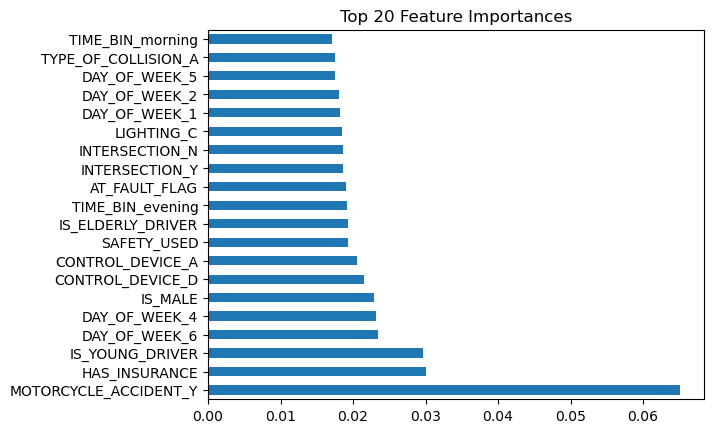

In [108]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()

We checked 